In [37]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv('C:\\Users\\dell\\Downloads\\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [39]:
df=df.drop(columns=["CustomerID","Gender","Age"],axis=1)

In [40]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


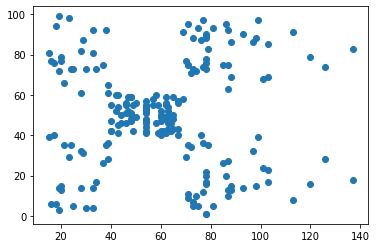

In [41]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

In [42]:
from sklearn.cluster import KMeans

In [43]:
wcss = []

for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

In [44]:
wcss

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25022.485004530354,
 21838.863692828912,
 19657.783608703958,
 17595.28888108518,
 15810.343426539726,
 14544.190532048597,
 13120.300734791526,
 12107.781672397372,
 10952.161482377272,
 9918.463109354414,
 9454.926984126983,
 8501.176606726607,
 8083.273693331759]

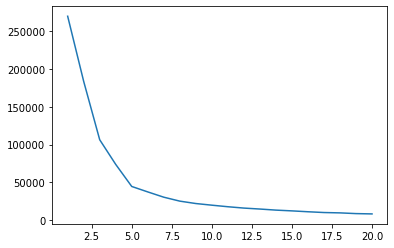

In [46]:
plt.plot(range(1,21),wcss)

In [47]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [48]:
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [49]:
X[y_means == 3,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

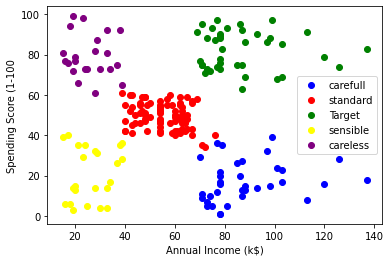

In [56]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue',label='carefull')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red',label='standard')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green',label='Target')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow',label='sensible')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='purple',label='careless')
plt.legend()
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100")
plt.show()

In [57]:
df["Target"]=y_means

In [58]:
df

,Annual Income (k$),Spending Score (1-100),Target
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0
